Correlation Check for the three variables that will be the target for regression models

In [2]:
import pandas as pd

base_path = r'Data files/'

# Helper functions to process the Google Trends CSV data and Excel data.
def process_google_trends_data(file_path):
    df = pd.read_csv(file_path, header=1)
    df.columns = ['Date', 'Search Interest']
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')
    df = df.set_index('Date').resample('M').mean()
    df.index = df.index.to_period('M').to_timestamp()
    return df

def load_excel_data(file_path, column_index_for_data):
    df = pd.read_excel(file_path, usecols=[0, column_index_for_data])
    df.columns = ['Date', 'Search Interest']
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.set_index('Date').sort_index()
    df.index = df.index.to_period('M').to_timestamp()
    return df.iloc[:25]

house_sales_df = load_excel_data(base_path + 'Total House sales.xlsx', 1)  
gold_production_df = load_excel_data(base_path + 'Gold production.xlsx', 1) 
investment_in_TR_df = load_excel_data(base_path + 'Investment in TR bank accounts.xlsx', 1) 

# Merge all dataframes
data_frames = [house_sales_df, gold_production_df, investment_in_TR_df]
merged_df = pd.concat(data_frames, axis=1, join='outer')

# Update the column names
merged_df.columns = [
    'House Sales',
    'Gold production',
    'Investment in TR'
]

# Calculate the correlation matrix for the final dataframe
correlation_matrix = merged_df.corr()

correlation_matrix

C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,House Sales,Gold production,Investment in TR
House Sales,1.000000,-0.141218,0.129120
Gold production,-0.141218,1.000000,-0.241879
Investment in TR,0.129120,-0.241879,1.000000


First Regression

House Sales in Turkey

Correlation check for independent variables to be used in the regression model for house prices

In [3]:
# Processing the Google Trends CSV files
sahibinden_df = process_google_trends_data(base_path + 'sahibinden.csv')
is_ilani_df = process_google_trends_data(base_path + 'iş ilanı.csv')
fed_faiz_df = process_google_trends_data(base_path + 'fed faiz.csv')
konut_kredisi_df = process_google_trends_data(base_path + 'konut kredisi.csv')
araba_ilani_df = process_google_trends_data(base_path + 'araba ilanı.csv')

# Loading and processing the Excel files
interest_rate_df = load_excel_data(base_path + 'Housing interest rate.xlsx', 1)  

# Merge all dataframes
data_frames2 = [house_sales_df, interest_rate_df, sahibinden_df, is_ilani_df, fed_faiz_df, konut_kredisi_df, araba_ilani_df]
merged_df_house_sales = pd.concat(data_frames2, axis=1, join='outer')

# Update the column names
merged_df_house_sales.columns = [
    'House Sales',
    'Interest Rate',
    'Sahibinden Search Interest',
    'İş İlanı Search Interest',
    'Fed Faiz Search Interest',
    'Konut Kredisi Search Interest',
    'Araba İlanı Search Interest'
]

# Calculate the correlation matrix for the final dataframe
correlation_matrix2 = merged_df_house_sales.corr()

correlation_matrix2



C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,House Sales,Interest Rate,Sahibinden Search Interest,İş İlanı Search Interest,Fed Faiz Search Interest,Konut Kredisi Search Interest,Araba İlanı Search Interest
House Sales,1.000000,-0.158355,0.187107,-0.411864,-0.026327,-0.089188,-0.156231
Interest Rate,-0.158355,1.000000,-0.788156,0.312840,-0.347840,-0.178256,0.464260
Sahibinden Search Interest,0.187107,-0.788156,1.000000,-0.069533,0.381406,0.493048,-0.421654
İş İlanı Search Interest,-0.411864,0.312840,-0.069533,1.000000,0.108942,0.047105,-0.084726
Fed Faiz Search Interest,-0.026327,-0.347840,0.381406,0.108942,1.000000,0.240640,-0.265887
Konut Kredisi Search Interest,-0.089188,-0.178256,0.493048,0.047105,0.240640,1.000000,-0.328842
Araba İlanı Search Interest,-0.156231,0.464260,-0.421654,-0.084726,-0.265887,-0.328842,1.000000


None of the independent variables have correlation larger than 0.5 with the house sales. The only thing is the interest rates for housing has relatively high correlation between "Sahibinden" word search in Google trends, which is the second-hand house and car marketplace in Turkey. However, it is not discarded because they individually have good correlation rate with house sales.

Visualization for the variables

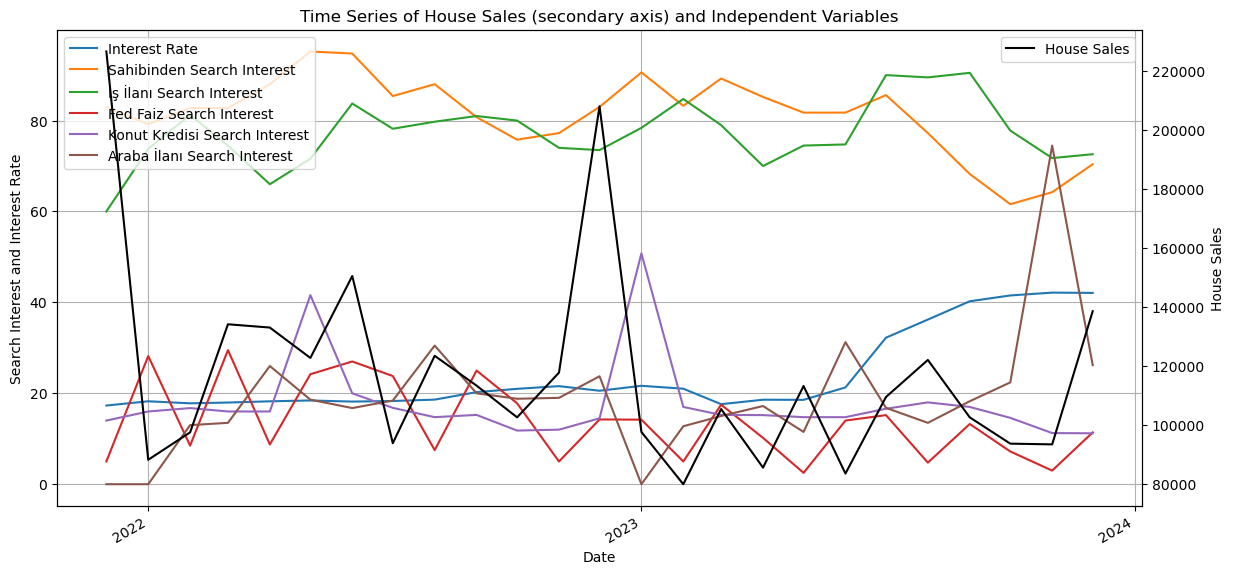

In [4]:
#Visualization

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the independent variables on the primary y-axis
for column in merged_df_house_sales.columns.drop('House Sales'):
    ax1.plot(merged_df_house_sales.index, merged_df_house_sales[column], label=column)

# Set up the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Interest and Interest Rate')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary y-axis for 'House Sales'
ax2 = ax1.twinx()  
ax2.plot(merged_df_house_sales.index, merged_df_house_sales['House Sales'], label='House Sales', color='black')
ax2.set_ylabel('House Sales')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Title and formatting for the x-axis
plt.title('Time Series of House Sales (secondary axis) and Independent Variables')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate date labels to prevent overlap

plt.show()


Regression Model for House Sales

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

merged_df_house_sales['House Sales'] +=1
X = merged_df_house_sales.drop(columns=['House Sales'])
y = merged_df_house_sales['House Sales']

for col in X.columns:
    # Convert columns to numeric, coercing errors to NaN
    X[col] = pd.to_numeric(X[col], errors='coerce')
    
# Initialize the Linear Regression model
regressor = LinearRegression()

regressor.fit(X, y)

y_pred = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 744500537.4062554
R-squared: 0.3751688255835991
Intercept: 48176.702212877935
Coefficients: [ 2974.72601894  3350.35148904 -2937.10134999    23.28055203
 -1748.56408495  -904.78589036]


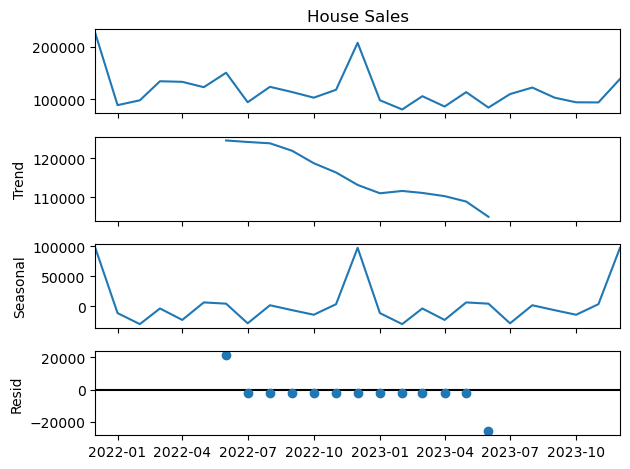

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

target = merged_df_house_sales['House Sales']
# Decompose the time series
decomposition_results = seasonal_decompose(target, model='additive', period=12)

# Plot the decomposed components
decomposition_results.plot()
plt.show()


Residual Analysis

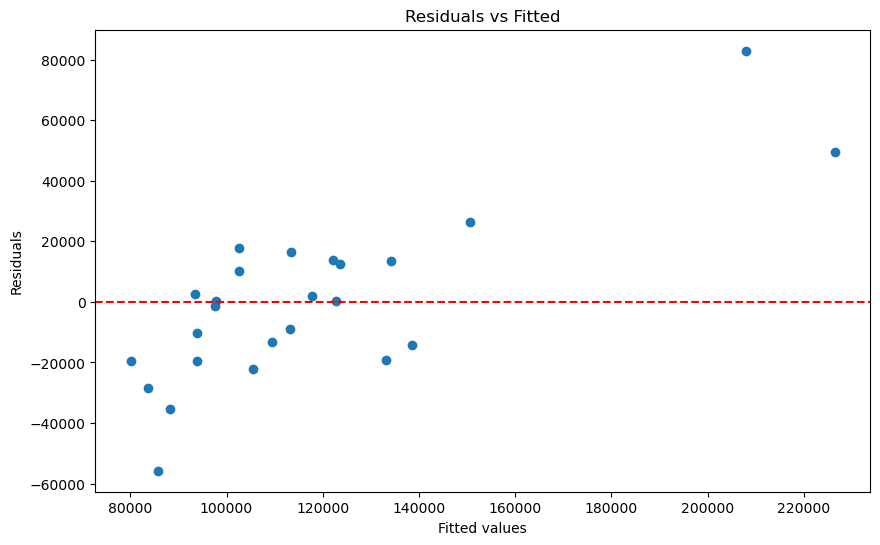

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


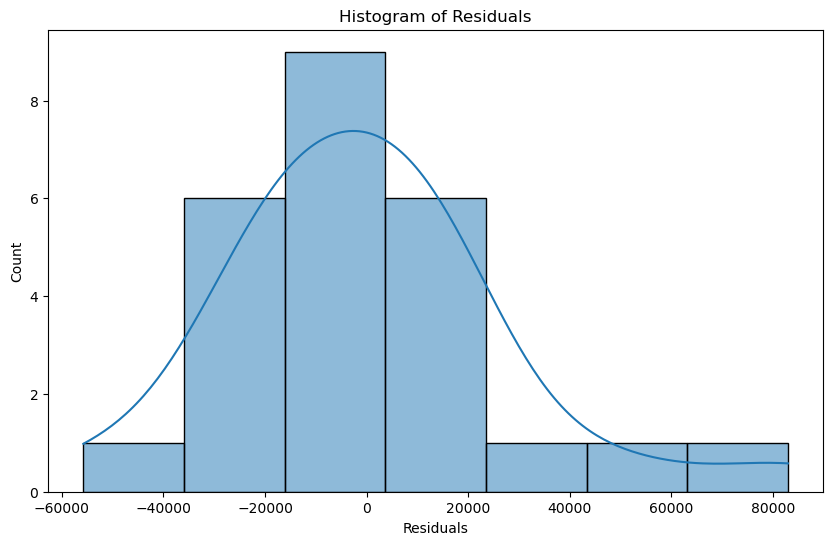

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()




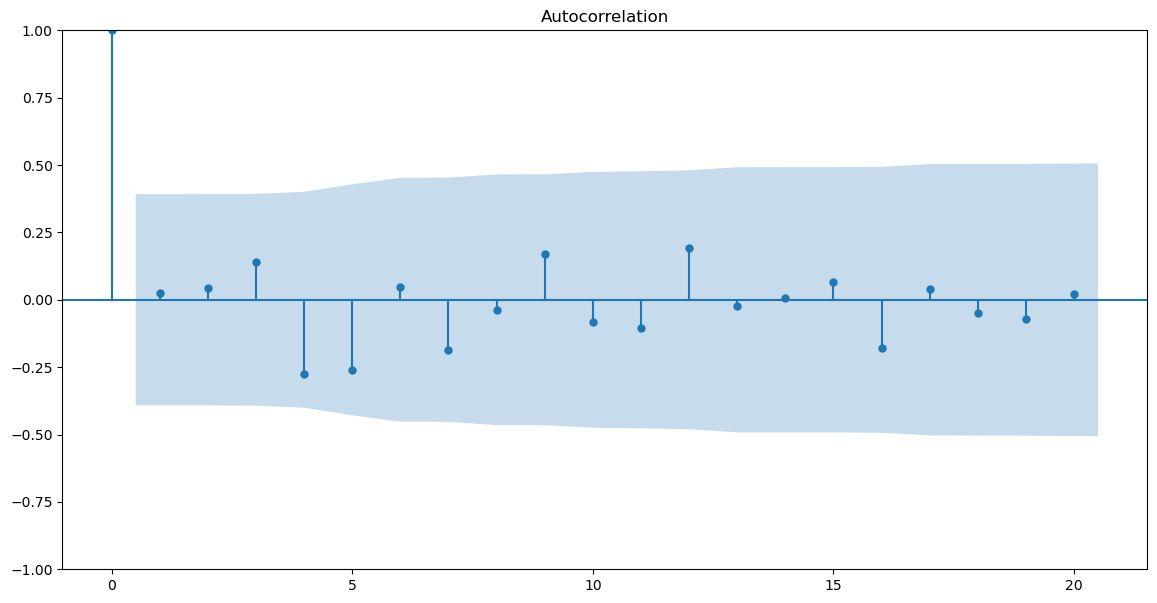

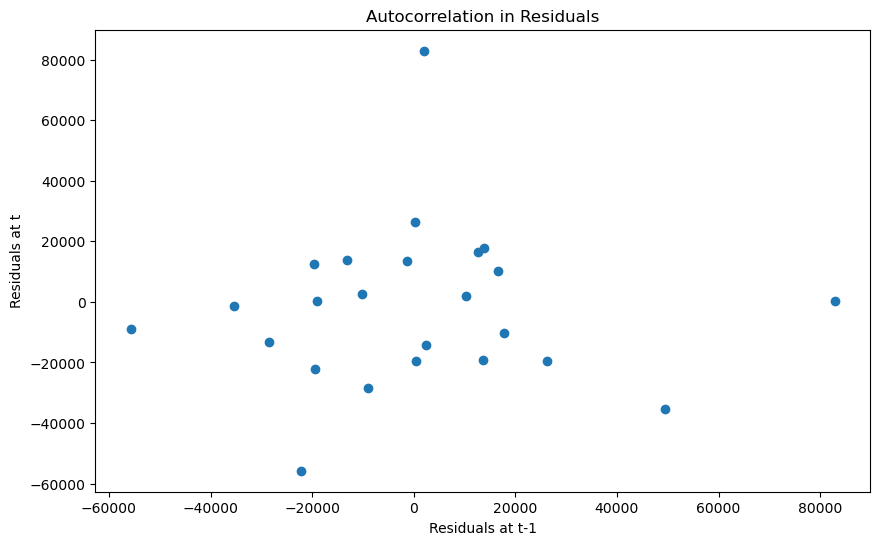

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(14, 7))
plot_acf(residuals, ax=ax, lags=20)
plt.show()


# Checking for autocorrelation: Scatter plot of residuals at t against residuals at t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals.iloc[:-1], residuals.iloc[1:])
plt.title('Autocorrelation in Residuals')
plt.xlabel('Residuals at t-1')
plt.ylabel('Residuals at t')
plt.show()



Adding differencing methodology to get rid of trend in the residuals

In [9]:

X['Time'] = np.arange(len(X))
X['Time^2'] = X['Time']**2

# Now, 'Time' acts as a trend variable in regression model

y_diff = y.diff().dropna()  # First difference of the target variable

# If using 'X' with additional predictors, ensure to align 'X' with 'y_diff'
X_aligned = X.iloc[1:, :]  # Drop the first row to align with 'y_diff'


regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_aligned, y_diff)

# Predict on the test set
y_pred2 = regressor.predict(X_aligned)

# Evaluate the model
mse = mean_squared_error(y_diff, y_pred2)
r2 = r2_score(y_diff, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 1154271764.8721108
R-squared: 0.46929198216323476
Intercept: -417964.51785275346
Coefficients: [ 6439.81414446  5447.50299168 -1519.91233755  -885.97091808
 -4058.12007609   142.97876668  8376.86214767  -437.27443054]


Residual Analysis with Differencing

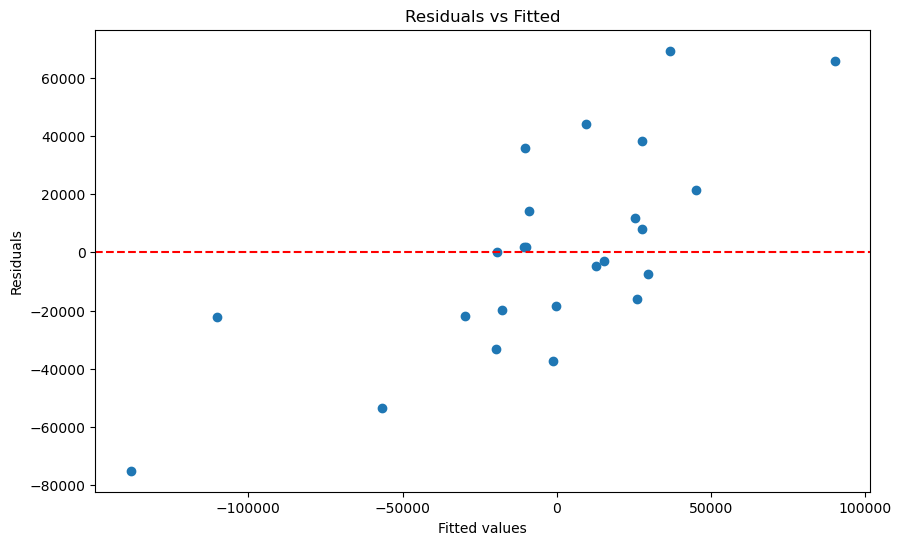

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


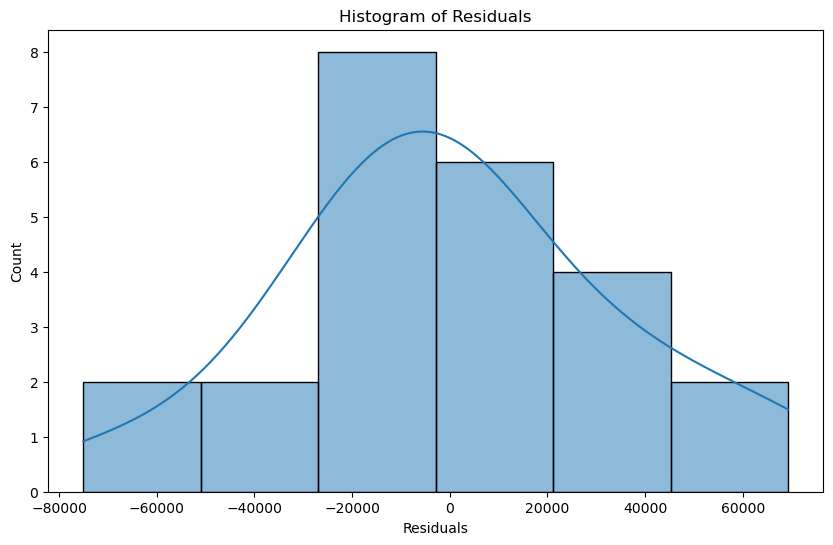

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y_diff - y_pred2

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_diff, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()



Logarithm Approach

In [11]:
import numpy as np

y = pd.to_numeric(y, errors='coerce')
y_log = np.log(y)

regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X, y_log)

# Predict on the test set
y_pred3 = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y_log, y_pred3)
r2 = r2_score(y_log, y_pred3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 0.028599469140488457
R-squared: 0.5464433731962333
Intercept: 10.155155088235976
Coefficients: [ 0.06344451  0.0333105  -0.02743811 -0.00238486 -0.01776231 -0.00755326
  0.04627941 -0.00354024]


Residuals with Logarithmic Approach

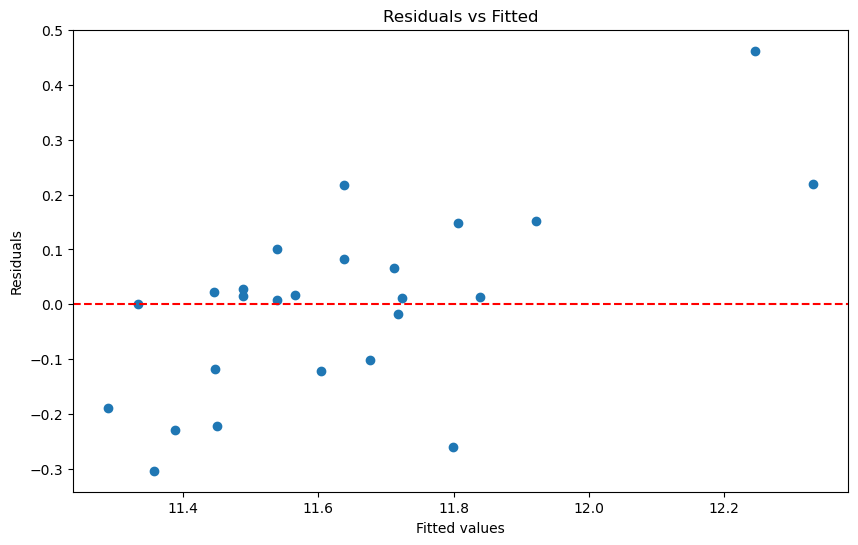

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


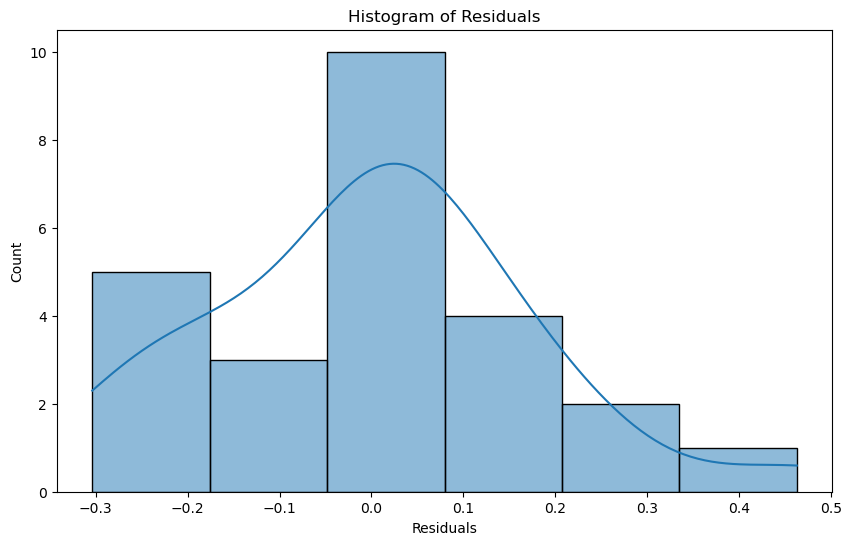

In [12]:
# Calculate the residuals
residuals = y_log - y_pred3

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_log, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

Bot logarithmic approach and differencing method will be applied simultaneously

In [13]:
merged_df_house_sales['House Sales']=pd.to_numeric(y, errors='coerce')
merged_df_house_sales['Log_House_Sales'] = np.log(merged_df_house_sales['House Sales'])

# Apply differencing to the log-transformed 'House Sales' to remove trends and induce stationarity

merged_df_house_sales['Diff_Log_House_Sales'] = merged_df_house_sales['Log_House_Sales'].diff()

# Remove the first row with NaN that results from differencing
merged_df_house_sales = merged_df_house_sales.dropna()

X = merged_df_house_sales.drop(columns=['Diff_Log_House_Sales'])
y = merged_df_house_sales['Diff_Log_House_Sales']


# Initialize the Linear Regression model
regressor = LinearRegression()

regressor.fit(X, y)

y_pred = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 0.026874175256056954
R-squared: 0.7753439131692001
Intercept: -28.572917399910565
Coefficients: [-1.08116141e-05  3.56977841e-03  1.24766307e-02  7.54113870e-03
 -1.26372266e-02 -1.61023522e-02  3.68048765e-03  2.45255310e+00]


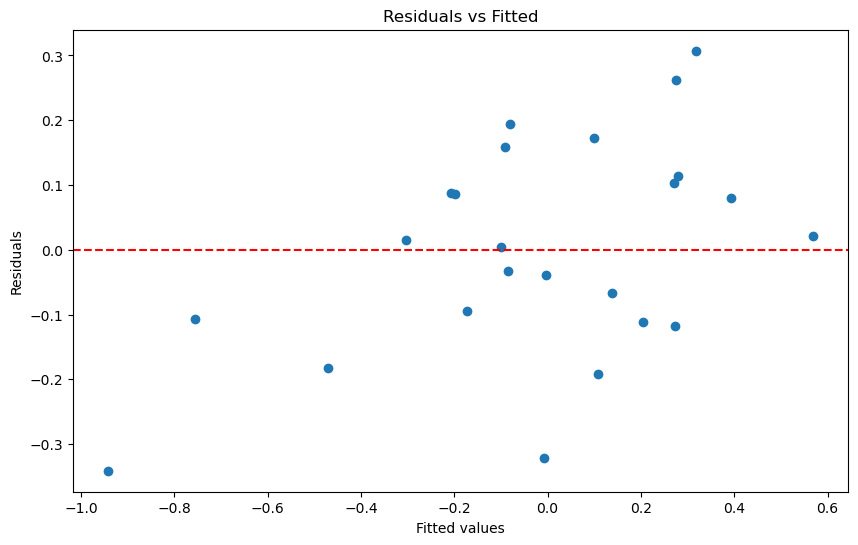

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


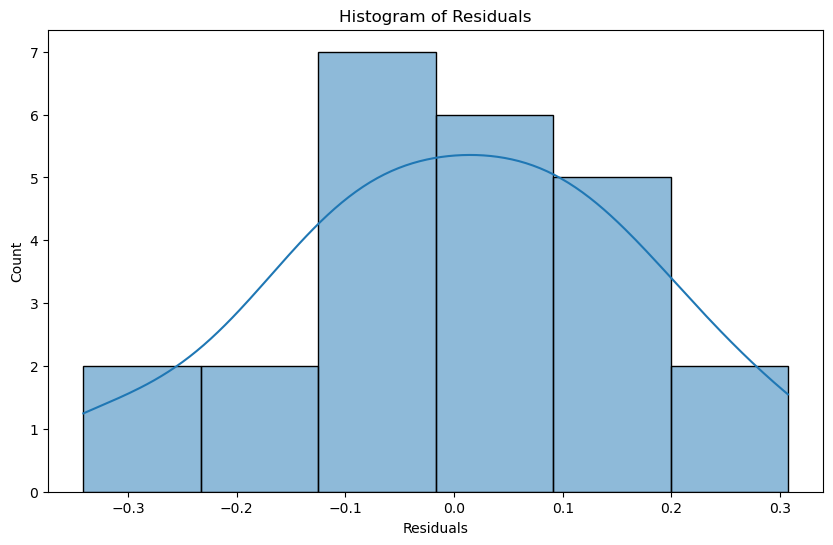

In [14]:
# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

In [15]:
y_lag4 = y.shift(4)

# Include this new lagged variable in your DataFrame of predictors 'X'
X['y_lag4'] = y_lag4

# Since we've introduced NaNs by shifting, we need to remove rows with NaN values
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]  # Make sure to align 'y' with the cleaned 'X'

# Split your data into training and testing sets as appropriate
# ...

# Initialize and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_clean, y_clean)

y_pred = regressor.predict(X_clean)

# Evaluate the model
mse = mean_squared_error(y_clean, y_pred)
r2 = r2_score(y_clean, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)



Mean Squared Error: 0.00910721556713814
R-squared: 0.9032318853448605
Intercept: -15.919840850249242
Coefficients: [-3.15515144e-06  1.76043612e-02  2.49639430e-02 -4.68969155e-03
 -8.75186902e-03 -2.45021480e-02 -9.96383678e-05  1.26923066e+00
 -1.57452794e-01]


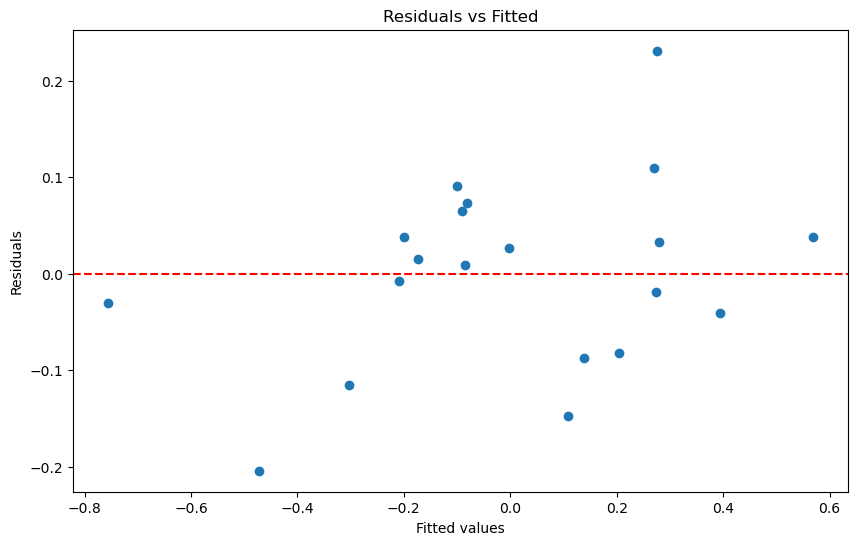

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


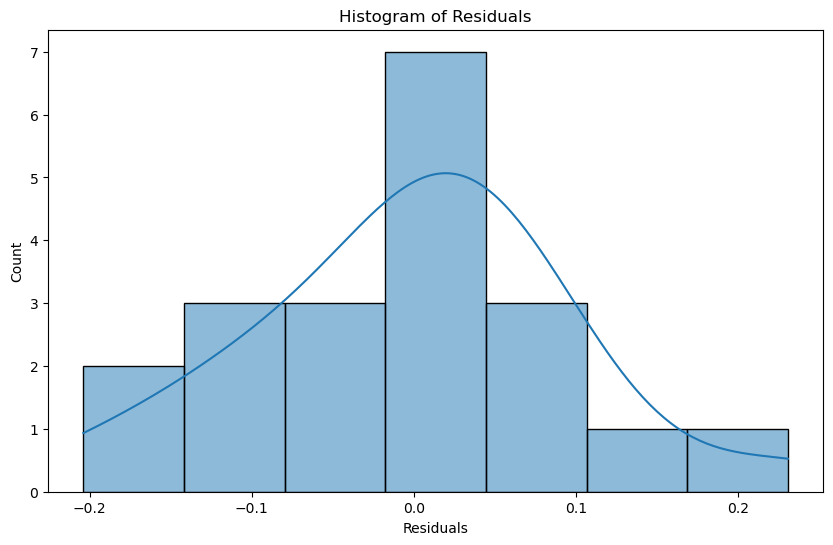

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y_clean - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_clean, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

Second Regression

Gold Production in Turkey

Correlation check for independent variables to be used in the regression model for gold production

In [17]:
#correlation check

# Processing the Google Trends CSV files
altin_kac_TL_df = process_google_trends_data(base_path + 'altın kaç TL.csv')
elazig_maden_olayi_df = process_google_trends_data(base_path + 'elazığ maden olayı.csv')
fed_faiz_df = process_google_trends_data(base_path + 'fed faiz.csv')


# Loading and processing the Excel files
international_gold_reserve_df = load_excel_data(base_path + 'international gold reserve.xlsx', 1)  
exchange_rate_df = load_excel_data(base_path + 'exchange rate.xlsx', 1)

# Merge all dataframes
data_frames3 = [gold_production_df, international_gold_reserve_df, altin_kac_TL_df, elazig_maden_olayi_df, fed_faiz_df, exchange_rate_df]
merged_df_gold_production = pd.concat(data_frames3, axis=1, join='outer')

# Update the column names
merged_df_gold_production.columns = [
    'Gold Production',
    'International Gold Reserve',
    'Altın kaç TL Search Interest',
    'Elazığ Maden Olayı Search Interest',
    'Fed Faiz Search Interest',
    'Exchange Rate'
]


# Calculate the correlation matrix for the final dataframe
correlation_matrix3 = merged_df_gold_production.corr()

correlation_matrix3

C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Gold Production,International Gold Reserve,Altın kaç TL Search Interest,Elazığ Maden Olayı Search Interest,Fed Faiz Search Interest,Exchange Rate
Gold Production,1.000000,-0.021554,0.295240,-0.147589,-0.125673,-0.304648
International Gold Reserve,-0.021554,1.000000,-0.289371,0.131253,-0.239947,0.638112
Altın kaç TL Search Interest,0.295240,-0.289371,1.000000,-0.484116,-0.139616,-0.701420
Elazığ Maden Olayı Search Interest,-0.147589,0.131253,-0.484116,1.000000,0.204457,0.551499
Fed Faiz Search Interest,-0.125673,-0.239947,-0.139616,0.204457,1.000000,-0.155597
Exchange Rate,-0.304648,0.638112,-0.701420,0.551499,-0.155597,1.000000


Visualization for the Variables - Gold Production Regression

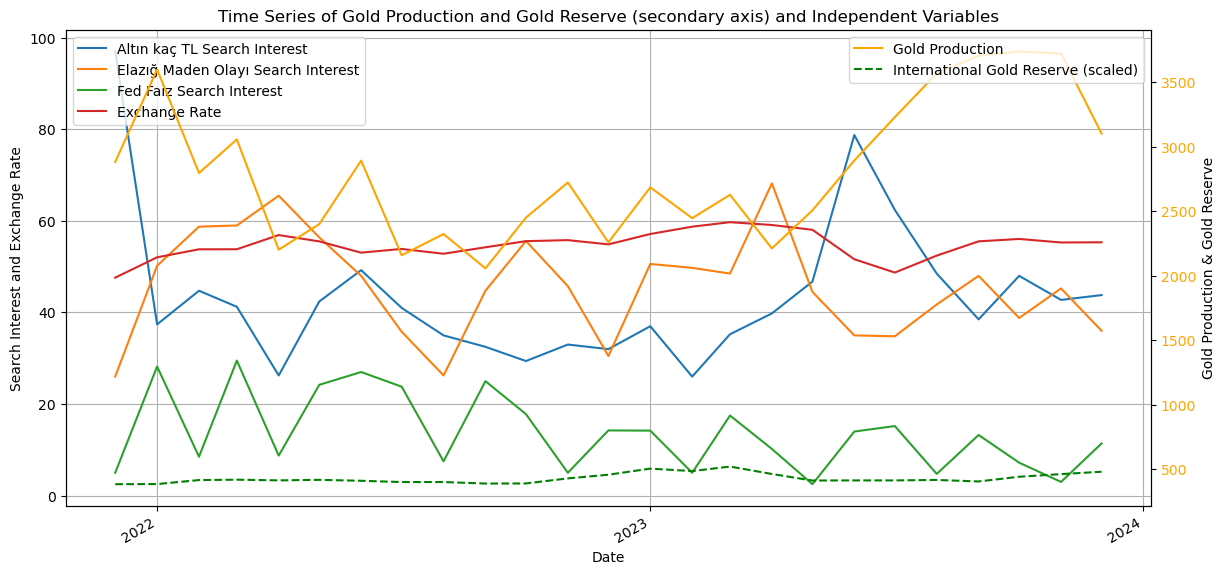

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the independent variables on the primary y-axis
for column in merged_df_gold_production.columns.drop(['Gold Production', 'International Gold Reserve']):
    ax1.plot(merged_df_gold_production.index, merged_df_gold_production[column], label=column)

# Set up the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Interest and Exchange Rate')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary y-axis for 'Gold Production' and 'International Gold Reserve'
ax2 = ax1.twinx()  
ax2.plot(merged_df_gold_production.index, merged_df_gold_production['Gold Production'], label='Gold Production', color='orange')
ax2.plot(merged_df_gold_production.index, merged_df_gold_production['International Gold Reserve'] / 100, label='International Gold Reserve (scaled)', color='green', linestyle='--')
ax2.set_ylabel('Gold Production & Gold Reserve')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Title and formatting for the x-axis
plt.title('Time Series of Gold Production and Gold Reserve (secondary axis) and Independent Variables')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate date labels to prevent overlap

plt.show()


Regression Model for Gold Production

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = merged_df_gold_production.drop(columns=['Gold Production'])
y = merged_df_gold_production['Gold Production']


# Initialize the Linear Regression model
regressor = LinearRegression()


regressor.fit(X, y)


y_pred = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)



Mean Squared Error: 223602.9023629319
R-squared: 0.18692258686716068
Intercept: 7085.103699174065
Coefficients: [ 4.57090703e-02  2.14020337e-01  1.01604307e+01 -1.22149977e+01
 -1.19680162e+02]


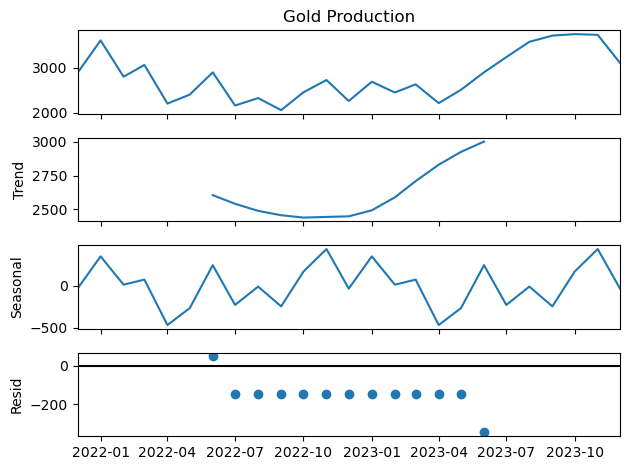

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

target = merged_df_gold_production['Gold Production']
# Decompose the time series
decomposition_results = seasonal_decompose(target, model='additive', period=12)

# Plot the decomposed components
decomposition_results.plot()
plt.show()


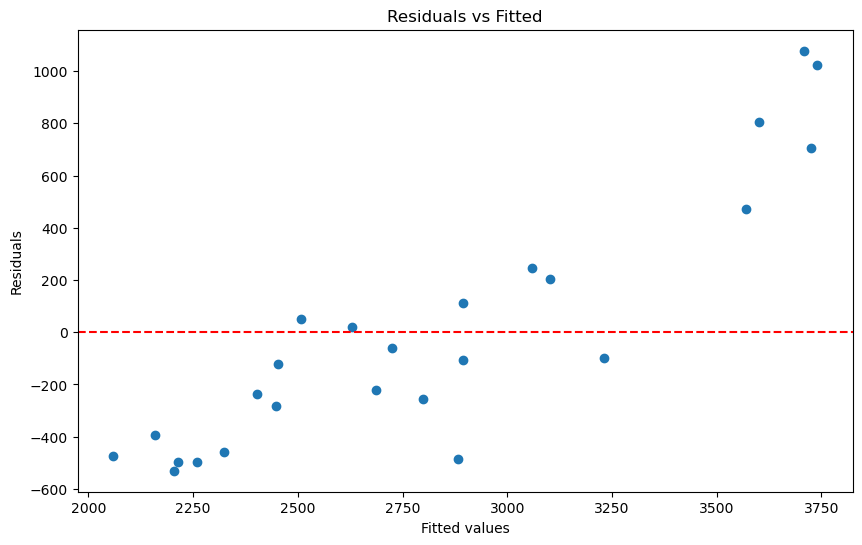

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


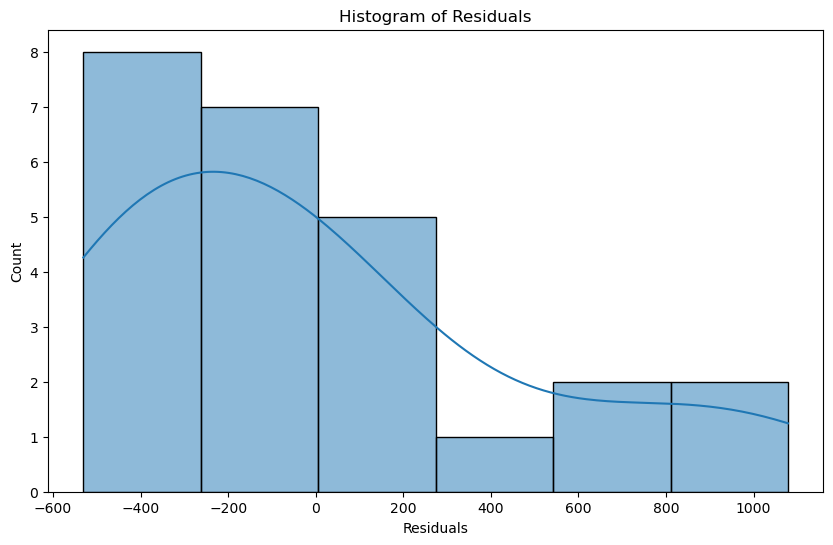

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()



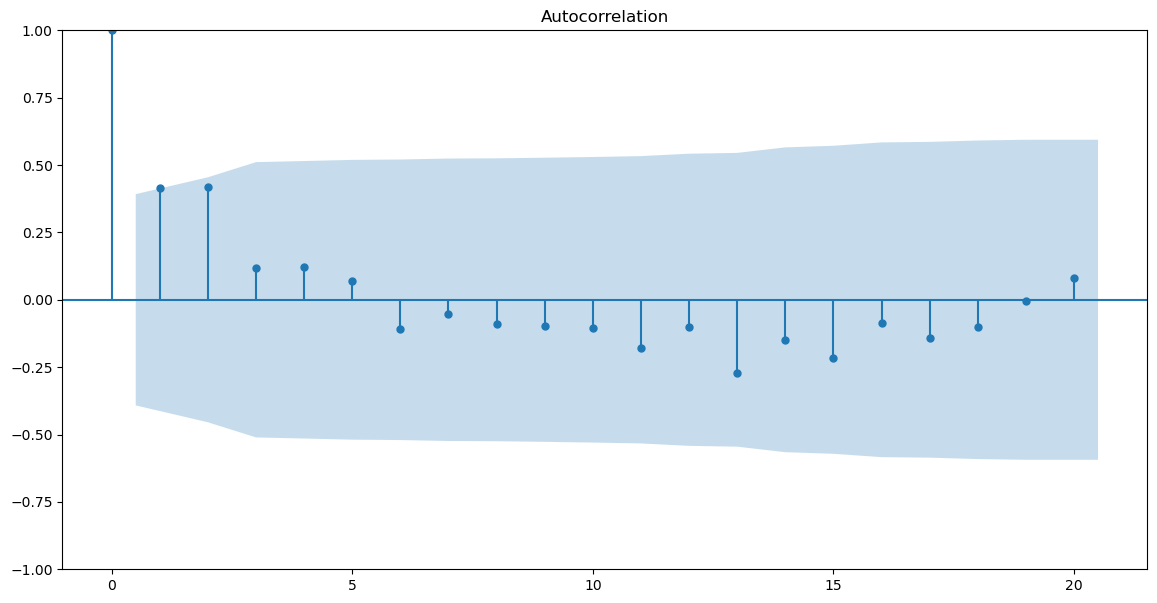

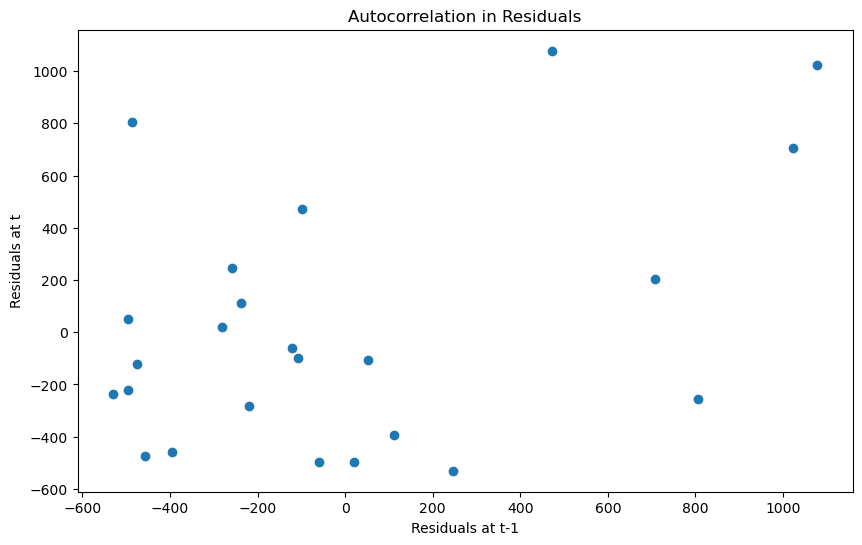

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(14, 7))
plot_acf(residuals, ax=ax, lags=20)
plt.show()


# Checking for autocorrelation: Scatter plot of residuals at t against residuals at t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals.iloc[:-1], residuals.iloc[1:])
plt.title('Autocorrelation in Residuals')
plt.xlabel('Residuals at t-1')
plt.ylabel('Residuals at t')
plt.show()


Differencing Method

In [23]:

X['Time'] = np.arange(len(X))
X['Time^2'] = X['Time']**2

# Now, 'Time' acts as a trend variable in regression model

y_diff = y.diff().dropna()  # First difference of the target variable

# If using 'X' with additional predictors, ensure to align 'X' with 'y_diff'
X_aligned = X.iloc[1:, :]  # Drop the first row to align with 'y_diff'


regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_aligned, y_diff)

# Predict on the test set
y_pred2 = regressor.predict(X_aligned)

# Evaluate the model
mse = mean_squared_error(y_diff, y_pred2)
r2 = r2_score(y_diff, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 151709.71468304584
R-squared: 0.21434225724532374
Intercept: 1337.514894186325
Coefficients: [-8.24033927e-03  5.94606534e+00  6.07722000e+00  1.53122219e+01
 -4.08441256e+01  8.77365266e+01 -2.77429861e+00]


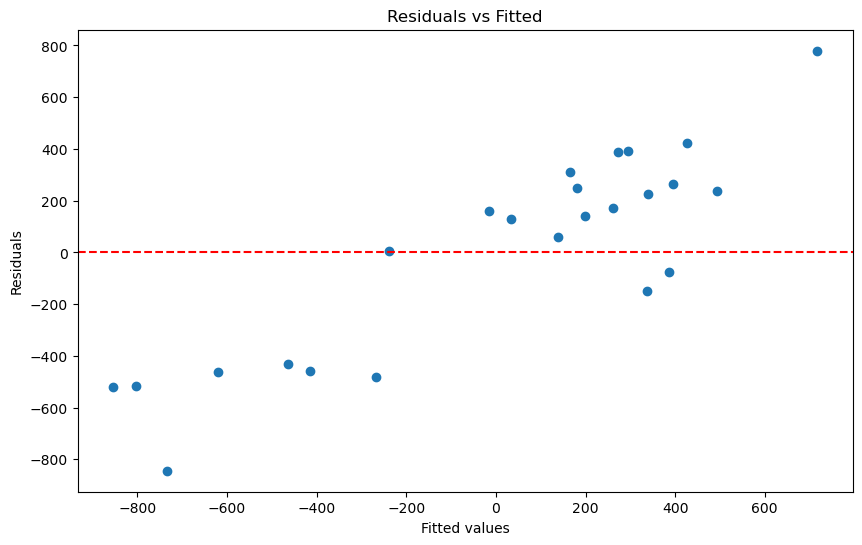

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


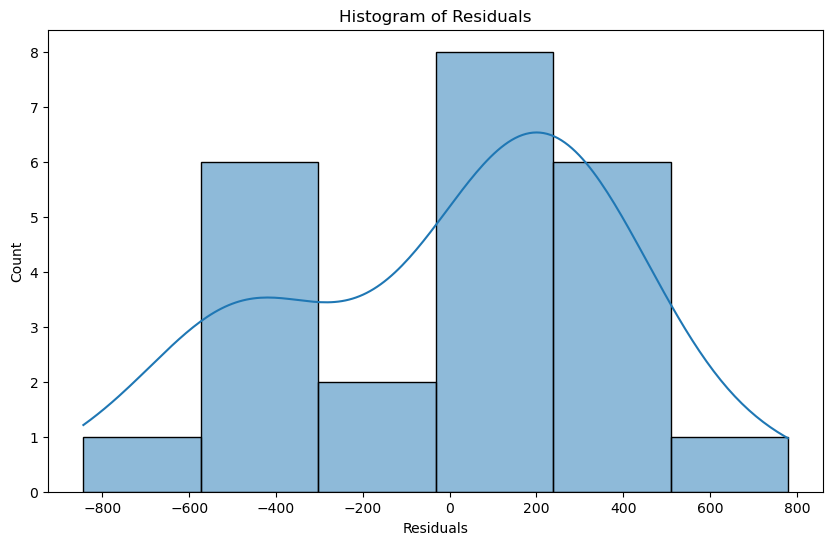

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y_diff - y_pred2

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_diff, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


Both differencing method and logarithm approach will be applied to get rid of the autocorrelation and trend in the residuals

In [25]:
merged_df_gold_production['Gold Production']=pd.to_numeric(y, errors='coerce')
merged_df_gold_production['Log_Gold_Production'] = np.log(merged_df_gold_production['Gold Production'])

# Apply differencing to the log-transformed 'House Sales' to remove trends and induce stationarity

merged_df_gold_production['Diff_Log_Gold_Production'] = merged_df_gold_production['Log_Gold_Production'].diff()

# Remove the first row with NaN that results from differencing
merged_df_gold_production = merged_df_gold_production.dropna()

X = merged_df_gold_production.drop(columns=['Diff_Log_Gold_Production'])
y = merged_df_gold_production['Diff_Log_Gold_Production']


# Initialize the Linear Regression model
regressor = LinearRegression()

regressor.fit(X, y)

y_pred = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 0.013422475152818572
R-squared: 0.4798271852495699
Intercept: -41.77595044589165
Coefficients: [-1.86277209e-03 -1.96117533e-05  2.71975087e-04 -4.64130074e-03
  5.91288843e-03  3.14361982e-02  5.83770770e+00]


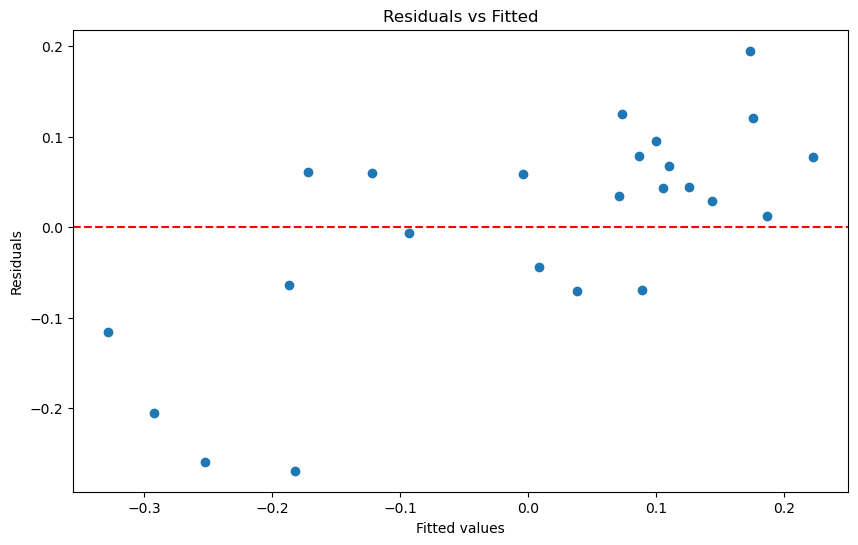

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


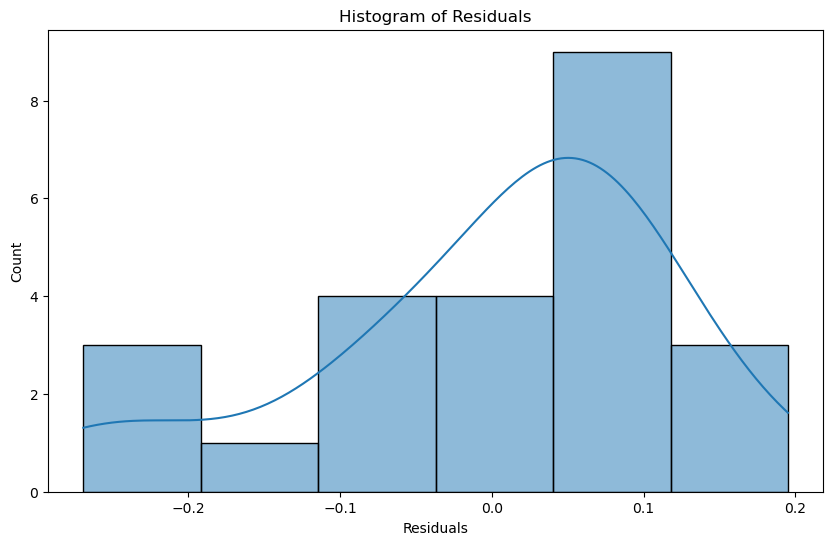

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


Autocorrelation with lag 6 gave better R^2

In [27]:
y_lag6 = y.shift(6)

# Include this new lagged variable in your DataFrame of predictors 'X'
X['y_lag6'] = y_lag6

# Since we've introduced NaNs by shifting, we need to remove rows with NaN values
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]  # Make sure to align 'y' with the cleaned 'X'


regressor = LinearRegression()
regressor.fit(X_clean, y_clean)

y_pred = regressor.predict(X_clean)

# Evaluate the model
mse = mean_squared_error(y_clean, y_pred)
r2 = r2_score(y_clean, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 0.003817486773003428
R-squared: 0.8028771434298683
Intercept: -30.205797893090853
Coefficients: [-1.46987860e-03 -1.18101174e-05 -3.03751208e-04  3.58249861e-03
 -3.14436964e-03 -5.37084016e-03  4.42467515e+00 -4.03512380e-01]


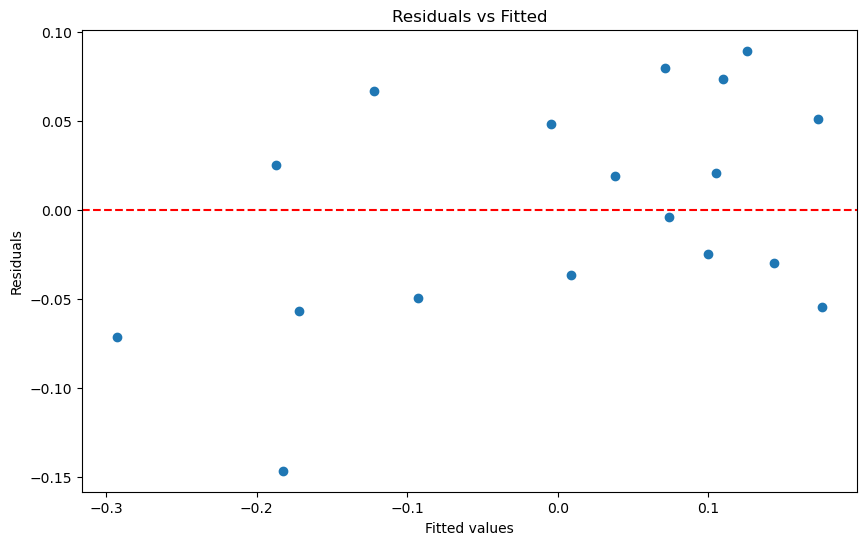

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


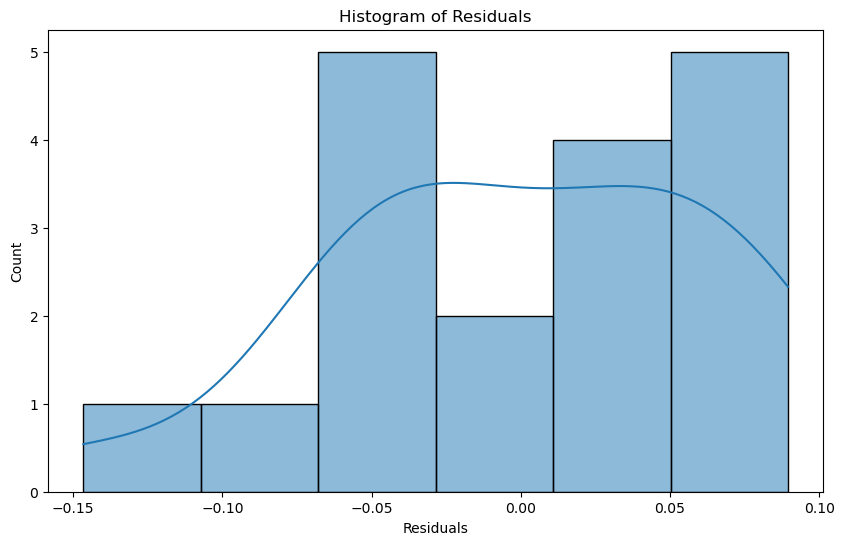

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y_clean - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_clean, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

Third Regression

Investment in TR from abroad

Correlation check for independent variables to be used in the regression model for the investment in Turkey from abroad

In [29]:
#correlation check

# Processing the Google Trends CSV files
invest_in_TR_google_trends_df = process_google_trends_data(base_path + 'invest in TR.csv')
politics_TR_df = process_google_trends_data(base_path + 'politics Turkey.csv')
inflation_in_TR_df = process_google_trends_data(base_path + 'inflation in Turkey.csv')

# Loading and processing the Excel files

exchange_rate_df = load_excel_data(base_path + 'exchange rate.xlsx', 1)


# Merge all dataframes
data_frames4 = [investment_in_TR_df, invest_in_TR_google_trends_df, exchange_rate_df, politics_TR_df, fed_faiz_df, inflation_in_TR_df]
merged_df_investment_in_TR = pd.concat(data_frames4, axis=1, join='outer')

# Update the column names
merged_df_investment_in_TR.columns = [
    'Investment in TR',
    'Invest in TR Search Interest',
    'Exchange Rate',
    'Politics TR Search Interest',
    'Fed Faiz Search Interest',
    'Inflation TR Search Interest'
]


# Calculate the correlation matrix for the final dataframe
correlation_matrix4 = merged_df_investment_in_TR.corr()

correlation_matrix4

C:\Users\benliler saime\AppData\Local\Temp\ipykernel_62084\2895888396.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,Investment in TR,Invest in TR Search Interest,Exchange Rate,Politics TR Search Interest,Fed Faiz Search Interest,Inflation TR Search Interest
Investment in TR,1.000000,0.155492,-0.561380,-0.539553,0.475487,0.535247
Invest in TR Search Interest,0.155492,1.000000,-0.337088,-0.277179,-0.048183,0.210638
Exchange Rate,-0.561380,-0.337088,1.000000,0.801836,-0.155597,0.012490
Politics TR Search Interest,-0.539553,-0.277179,0.801836,1.000000,-0.359635,-0.054644
Fed Faiz Search Interest,0.475487,-0.048183,-0.155597,-0.359635,1.000000,0.355051
Inflation TR Search Interest,0.535247,0.210638,0.012490,-0.054644,0.355051,1.000000


Visualization - Investment in Turkey from abroad

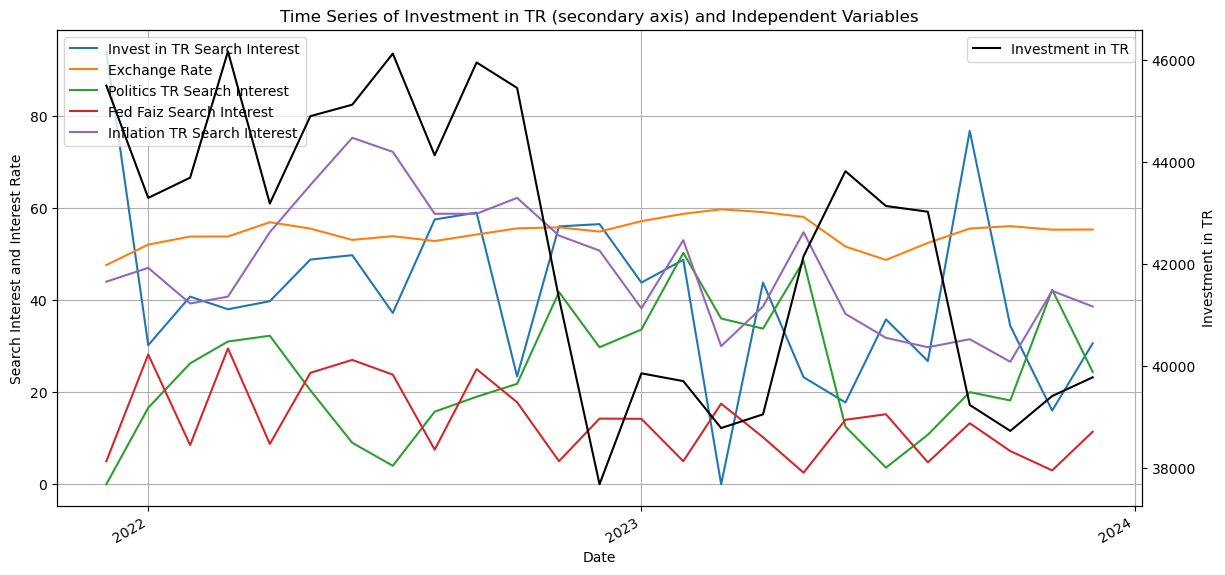

In [30]:
#Visualization

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the independent variables on the primary y-axis
for column in merged_df_investment_in_TR.columns.drop('Investment in TR'):
    ax1.plot(merged_df_investment_in_TR.index, merged_df_investment_in_TR[column], label=column)

# Set up the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Search Interest and Interest Rate')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')
ax1.grid(True)

# Set up the secondary y-axis for 'House Sales'
ax2 = ax1.twinx()  
ax2.plot(merged_df_investment_in_TR.index, merged_df_investment_in_TR['Investment in TR'], label='Investment in TR', color='black')
ax2.set_ylabel('Investment in TR')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend(loc='upper right')

# Title and formatting for the x-axis
plt.title('Time Series of Investment in TR (secondary axis) and Independent Variables')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()  # Rotate date labels to prevent overlap

plt.show()


Regression Model for Investment in Turkey from abroad

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = merged_df_investment_in_TR.drop(columns=['Investment in TR'])
y = merged_df_investment_in_TR['Investment in TR']


# Initialize the Linear Regression model
regressor = LinearRegression()


regressor.fit(X, y)


y_pred = regressor.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)



Mean Squared Error: 2430782.4503818364
R-squared: 0.6691962466433052
Intercept: 66400.02047648838
Coefficients: [ -19.35874465 -525.05069235   -7.31289445   62.74555671  102.33693547]


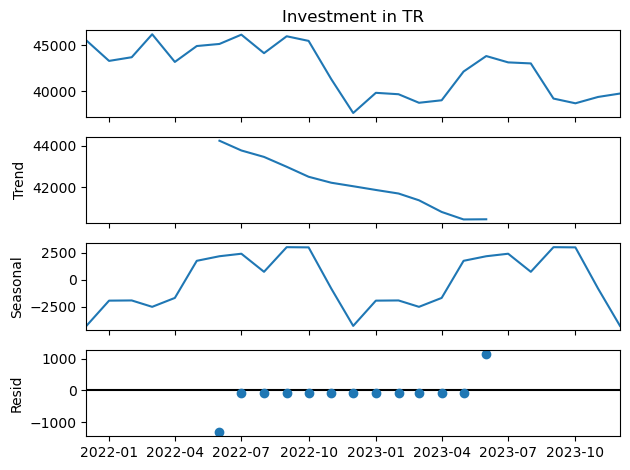

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

target = merged_df_investment_in_TR['Investment in TR']
# Decompose the time series
decomposition_results = seasonal_decompose(target, model='additive', period=12)

# Plot the decomposed components
decomposition_results.plot()
plt.show()


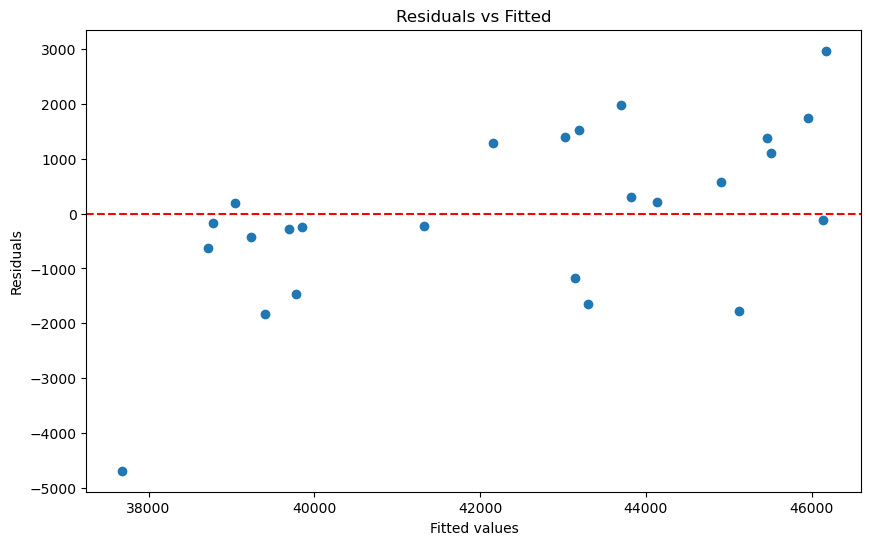

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


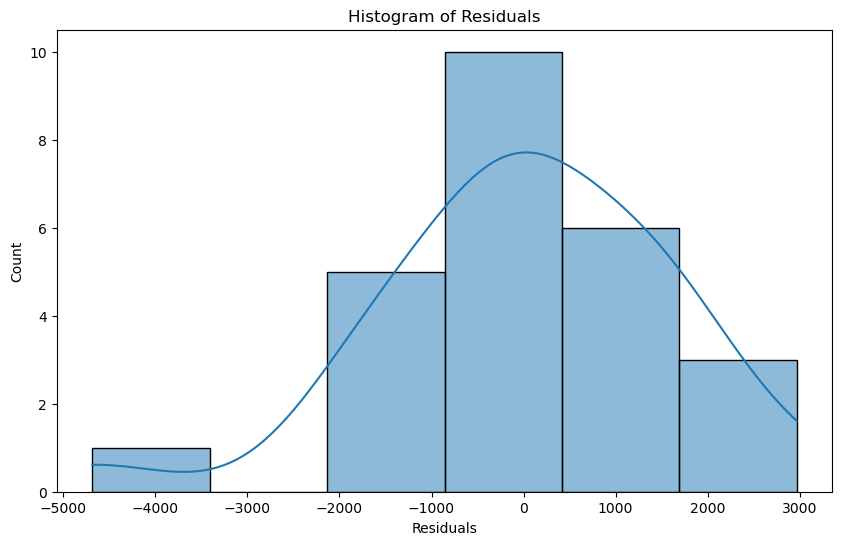

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()


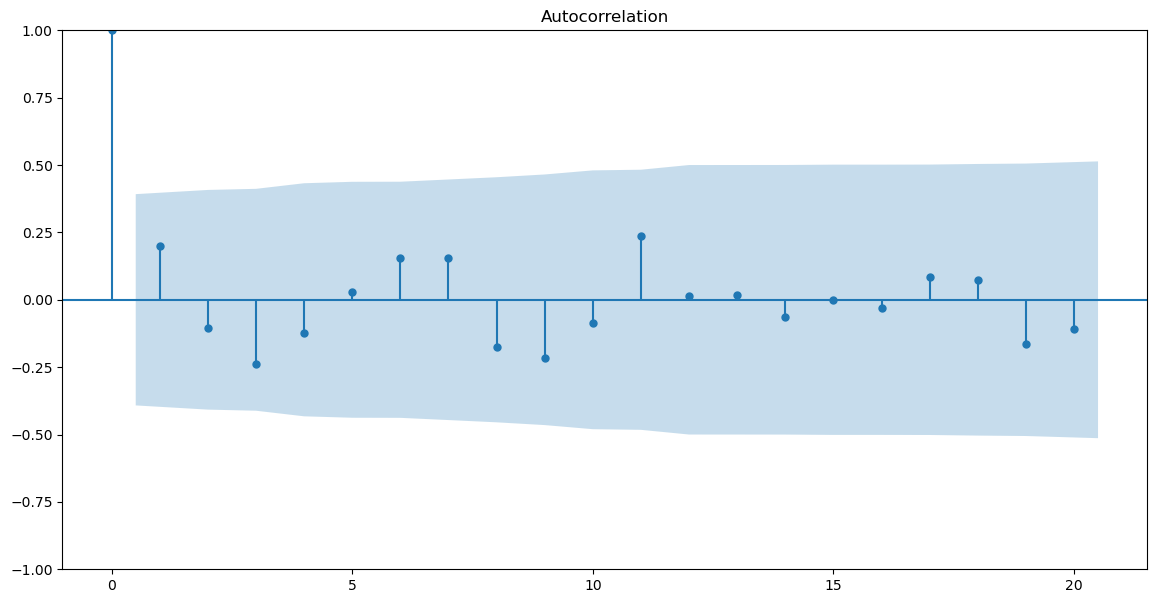

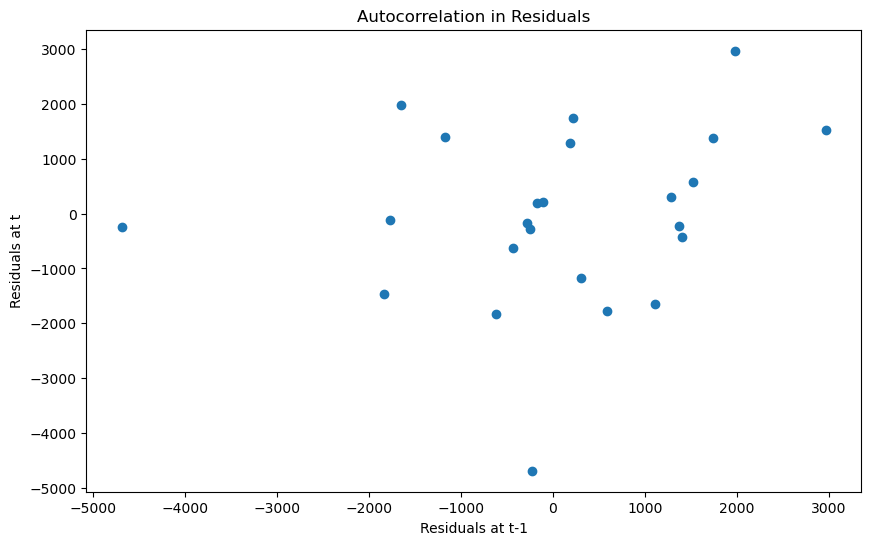

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(14, 7))
plot_acf(residuals, ax=ax, lags=20)
plt.show()


# Checking for autocorrelation: Scatter plot of residuals at t against residuals at t-1
plt.figure(figsize=(10, 6))
plt.scatter(residuals.iloc[:-1], residuals.iloc[1:])
plt.title('Autocorrelation in Residuals')
plt.xlabel('Residuals at t-1')
plt.ylabel('Residuals at t')
plt.show()


In [40]:
y_lag2 = y.shift(2)

# Include this new lagged variable in your DataFrame of predictors 'X'
X['y_lag2'] = y_lag2

# Since we've introduced NaNs by shifting, we need to remove rows with NaN values
X_clean = X.dropna()
y_clean = y.loc[X_clean.index]  # Make sure to align 'y' with the cleaned 'X'

# Split your data into training and testing sets as appropriate
# ...

# Initialize and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_clean, y_clean)

y_pred = regressor.predict(X_clean)

# Evaluate the model
mse = mean_squared_error(y_clean, y_pred)
r2 = r2_score(y_clean, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# To get the regression coefficients
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)


Mean Squared Error: 2150190.5133476737
R-squared: 0.7216221664097295
Intercept: 59690.012747098386
Coefficients: [-4.00720584e+01 -4.93073319e+02  1.54454693e+01  1.05979988e+02
  9.88968679e+01 -8.37517065e-02  1.94688453e-01]


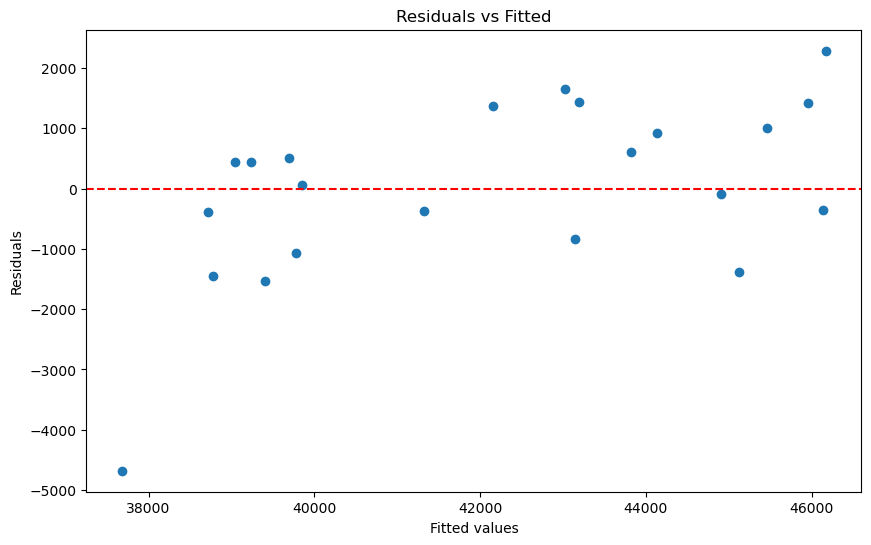

c:\Users\benliler saime\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


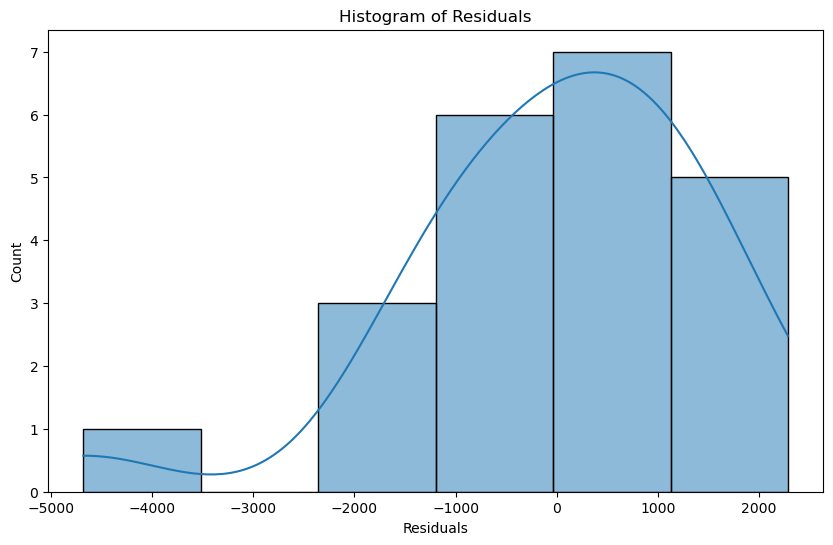

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Calculate the residuals
residuals = y_clean - y_pred

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_clean, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram and Q-Q plot for normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()
